# Tutorial: Exploring the Cars Dataset

This notebook provides a quick introduction to [Altair](https://altair-viz.github.io) for effective data visualization. 

**Acknowledgement** This tutorial is mainly based on the [Altair tutorial](https://altair-viz.github.io/altair-tutorial/notebooks/01-Cars-Demo.html) by Jake Vanderplas.

### Outline
1. Load data using pandas
2. Draw charts
3. Facet charts
3. Binning & Aggregation
4. Time series

In [ ]:
import pandas as pd

In [ ]:
import altair as alt
from altair import expr, datum

# Run this line to enable Altair in the Jupyter notebook
# Comment this line if you are using Google Colaboratory
#alt.renderers.enable('notebook')

## 1. Load data using pandas

Load the cars dataset from a csv file using panda

In [ ]:
# Load car data from example datasets
from vega_datasets import data
cars = data.cars()

# Load data from the local csv file
#cars = pd.read_csv('cars.csv')

In [ ]:
# Dataframe (rows * columns)
cars.shape

(406, 9)

In [ ]:
# Dataset dimensions
cars.dtypes

Name                        object
Miles_per_Gallon           float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Weight_in_lbs                int64
Acceleration               float64
Year                datetime64[ns]
Origin                      object
dtype: object

In [ ]:
# Dataset first rows
cars.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## 2. Draw charts

The fundamental object in Altair is the Chart which takes a dataframe as a single argument. 

The chart is used in conjunction [**marks**](https://altair-viz.github.io/user_guide/marks.html) and [**encodings**](https://altair-viz.github.io/user_guide/encoding.html):
- **Marks** enables us to represent each row in the data with a point, circle, square, bar, tick, ...
- **Encodings** specifies how a given data column should be mapped onto the visual properties of the visualization:
  - _x_: x-axis value
  - _y_: y-axis value
  - _color_: color of the mark
  - _opacity_: transparency/opacity of the mark
  - _shape_: shape of the mark
  - _size_: size of the mark
  - _row_: row within a grid of facet plots
  - _column_: column within a grid of facet plots
  
### Step 1: Load data and set the mark
The most basic chart contains the dataset, along with a **mark** to represent each row:

In [ ]:
alt.Chart(cars).mark_point()

### Step 2: Add encoding on the x-axis
Then, we need to **encode** columns of the data into visual features of the plot (e.g. x position, y position, size, color, etc.)

In [ ]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Maker
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970,chevrolet
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970,buick
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970,plymouth
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970,amc
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970,ford


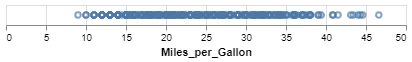

In [ ]:
# Add a x-axis encoding one of the dimensions
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon'
)

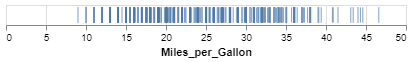

In [ ]:
# Use tick to better visualize each item
alt.Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon'
)

### Step 3: Add encoding on the y-axis
We can expand the chart into 2D by also encoding the *y position*. In this way, you can see the correlation between two data variables.

In [ ]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,Maker
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970,chevrolet
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970,buick
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970,plymouth
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970,amc
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970,ford


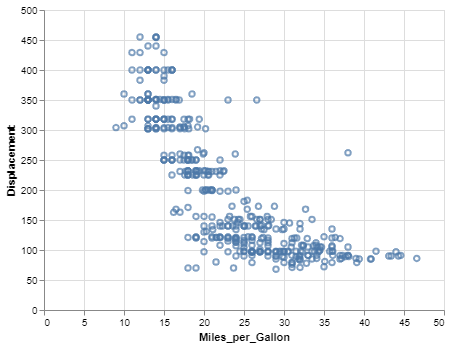

In [ ]:
# Add a y-axis encoding another quantitative dimension
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Displacement',
    tooltip=['Name', 'Year']
)

### Step 4: Add the color encoding
Next, we add the *color* encoding to display nominal attribute (color hue) or quantitative variable (color saturation) to display the 3rd data variable.

**Tip 1:** Altair will infer the type of data before creating the chart. But it is always good that we specify the type of data in the encoding.

[Altair](https://altair-viz.github.io/user_guide/encoding.html) allows to map four main types of data:
- Quantitative (Q): a continuous real-valued quantity
- Ordinal (O): a discrete ordered quantity
- Nominal (N): a discrete unordered category
- Temporal (T): a time or date value

**Tip 2:** Altair provides the interaction to pan and zoom along charts; Altair contains a shortcut to enable this via the ``interactive()`` method.

**Tip 3:** Add tooltip in the ``encoding()`` to show tooltip when hover on the mark.

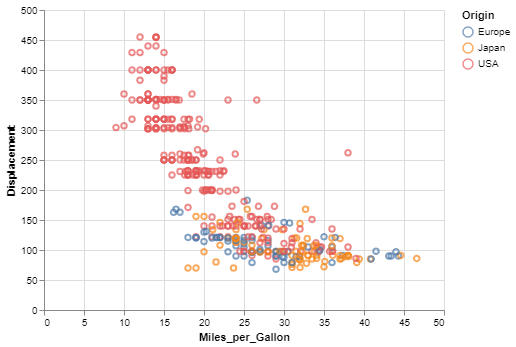

In [ ]:
# Add color to encode colors for a nominal variable.
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Displacement:Q',
    color='Origin:N',
    tooltip=['Name:N', 'Year:O']
).interactive()

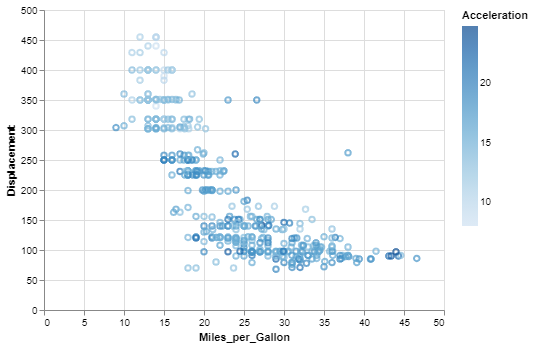

In [ ]:
# We can also bind color scale to a quantitative variable.
alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Displacement:Q',
    color='Acceleration:Q',
    tooltip=['Name:N', 'Year:O']
).interactive()

### Step 5: Chart configutation

1. The chart is too big? or too small? You can adjust the size and more by setting ``properties()`` of the chart (e.g., height, width, title).

2. Change axis labels to help your charts be more readable.

There are many things that you can change on the chart to make it looks better. Please read for more details from [chart configuration](https://altair-viz.github.io/user_guide/customization.html) and [top-levl configuration](https://altair-viz.github.io/user_guide/configuration.html).

In [ ]:
# Add color to encode colors for a nominal variable.
alt.Chart(cars).mark_point().encode(
    x=alt.X('Miles_per_Gallon:Q', title='Miles per Gallon'),
    y='Horsepower:Q',
    color='Origin:N',
    tooltip=['Name:N', 'Year:O']
).properties(
    title='The relationship between displacement and mile per gallon of cars',
    width=600,
    height=400
)

alt.Chart(...)

## 3. Facet chart

Altair provides a number of [compound plot](https://altair-viz.github.io/user_guide/compound_charts.html) types that can be used to create stacked, layered, faceted, and repeated charts.

The easiest way to create facet charts using *column* and *row* in ``encode()`` function.

In [ ]:
# Horsepower and Miles_per_Gallon per origin
alt.Chart(cars).mark_point().encode(
    x=alt.X('Miles_per_Gallon:Q', title='Miles per Gallon'),
    y='Horsepower:Q',
    color='Origin:N',
    column='Origin:N',
    tooltip=['Name:N', 'Year:O']
).properties(
    title='Hoursepower and miles per gallon of cars produce in different countries',
    width=200,
    height=200
)

alt.Chart(...)

Scatter plot: https://altair-viz.github.io/gallery/scatter_matrix.html
I will just copy and paste and change some code.

For more detail, please look at [Compound Charts: Layer, HConcat, VConcat, Repeat, Facet](https://altair-viz.github.io/user_guide/compound_charts.html)

## 4. Binning and aggregation
Altair provides [data transformation](https://altair-viz.github.io/user_guide/transform/index.html) functions to aggregate or filter data in the process of visualizing it. We just demonstrate a histogram here to give some idea.

In [ ]:
# We aggregate the values on the x-axis (binning) and encode the count of each bin on the y-axis.
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=True),
    y='count()',
    color='Origin:N'
)

alt.Chart(...)

In [ ]:
# We can change the number of bins.
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin:N'
)

alt.Chart(...)

In [ ]:
# We can use the count() transformation in every encoding
alt.Chart(cars).mark_bar().encode(
    x=alt.X('Miles_per_Gallon:Q', bin=alt.Bin(maxbins=30)),
    y=alt.Y('Horsepower:Q', bin=True),
    color='count()'
)

alt.Chart(...)

More information on Binning and Aggregation functions in Alrair is [here](https://altair-viz.github.io/user_guide/encoding.html#binning-and-aggregation).

## 5. Time series

Altair also provides modules to help with [time series](https://altair-viz.github.io/user_guide/times_and_dates.html).

**Tip:** Convert the time into ```YYYY-mm-dd``` format so that Altair understand that it is time series and don't forget to add ```{variable}:T``` at the end of the encoding.

In [ ]:
# Convert Year column into datetime
cars['Year'] = pd.to_datetime(cars['Year'], format='%Y')

In [ ]:
cars['Year']

0     1970-01-01
1     1970-01-01
2     1970-01-01
3     1970-01-01
4     1970-01-01
         ...    
401   1982-01-01
402   1982-01-01
403   1982-01-01
404   1982-01-01
405   1982-01-01
Name: Year, Length: 406, dtype: datetime64[ns]

In [ ]:
# We can see the trends of miles per gallon over the years.
alt.Chart(cars).mark_point().encode(
    x='Year:T',
    y='Miles_per_Gallon:Q',
    color='Origin:N'
).interactive()

alt.Chart(...)

In [ ]:
# We can draw the mean for each group.
lines = alt.Chart(cars).mark_line().encode(
    x=alt.X('Year:T', title="Year"),
    y=alt.Y('mean(Miles_per_Gallon):Q', title='Miles per Gallon'),
    color='Origin:N'
).interactive()

lines

alt.Chart(...)

In [ ]:
# We can use area marks to visualize the confidence interval of the estimate of the mean.
alt.Chart(cars).mark_area().encode(
    x='Year:T',
    y=alt.Y('ci0(Miles_per_Gallon)', title='Miles Per Gallon'),
    y2='ci1(Miles_per_Gallon)'
).interactive()

alt.Chart(...)

In [ ]:
# We can split between the contries.
# We can use area marks to visualize the confidence interval of the estimate of the mean.
spread = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year:T',
    y='ci0(Miles_per_Gallon):Q',
    y2='ci1(Miles_per_Gallon):Q',
    color='Origin:N'
).interactive()

In [ ]:
# We can add line layer to the chart.
spread + lines

alt.LayerChart(...)

Altair provide the build-in functions for [data transformation](https://altair-viz.github.io/user_guide/transform/index.html). Some interesting functions are as follows:
- Regression Transform https://altair-viz.github.io/user_guide/transform/regression.html#user-guide-regression-transform
- LOESS Transform https://altair-viz.github.io/user_guide/transform/loess.html#user-guide-loess-transform

## 7. Summary
**Building blocks of data visualization**

1. Marks: mark_point(), mark_line(), mark_tick(), mark_bar(), mark_area(), mark_rect(), etc.
2. Encodings: x, y, color, shape, size, row, column, text, tooltip, etc.
3. Binning and aggregations: a List of available aggregations can be found in Altair’s documentation
4. Stacking and layering (alt.layer <-> +, alt.hconcat <-> |, alt.vconcat <-> &)

**What's next**

See more examples of data visualizations with Altair at: https://altair-viz.github.io/gallery/

Learn in more detail from the Altair tutorial: https://altair-viz.github.io/altair-tutorial/README.html